In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


In [ ]:
!wget https://www.dropbox.com/scl/fi/3u7vzedq0g3bkwv63oc4l/archive-4.zip?rlkey=5sopsc0a4xye6lmnwgznmfxwh&dl=0

--2024-03-17 16:45:11--  https://www.dropbox.com/scl/fi/3u7vzedq0g3bkwv63oc4l/archive-4.zip?rlkey=5sopsc0a4xye6lmnwgznmfxwh
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05efd0dee448b2e4a87100d467.dl.dropboxusercontent.com/cd/0/inline/CPR5Q7YZXPvW_WGf067jBg87v9szgRCsGKLaZ2nfkOjrsu9eIFxJApbde3VxLgIExzE-g6CmtOHhsPSG7SZDjhwjAIK7LM3kRb8my1v78pTlK5QXklcdJb9rYOC9UGu__gkU-j_5H8RQqMheldy8EwTG/file# [following]
--2024-03-17 16:45:11--  https://uc05efd0dee448b2e4a87100d467.dl.dropboxusercontent.com/cd/0/inline/CPR5Q7YZXPvW_WGf067jBg87v9szgRCsGKLaZ2nfkOjrsu9eIFxJApbde3VxLgIExzE-g6CmtOHhsPSG7SZDjhwjAIK7LM3kRb8my1v78pTlK5QXklcdJb9rYOC9UGu__gkU-j_5H8RQqMheldy8EwTG/file
Resolving uc05efd0dee448b2e4a87100d467.dl.dropboxusercontent.com (uc05efd0dee448b2e4a87100d467.dl.dropboxusercontent.com)... 162.125.80.15, 2

In [ ]:
!unzip /content/archive-4.zip?rlkey=5sopsc0a4xye6lmnwgznmfxwh

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

Data Analyze

Testing and Train Directories

In [ ]:
train_dir = '/content/Training'
testing_dir = '/content/Testing'

In [ ]:
 IMG_SIZE = 180

#Train DataSet
train_dataset = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (IMG_SIZE, IMG_SIZE),
  batch_size = 32)

#Validation DataSet
val_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 32)



Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [ ]:
class_names = train_dataset.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

Visualization Data

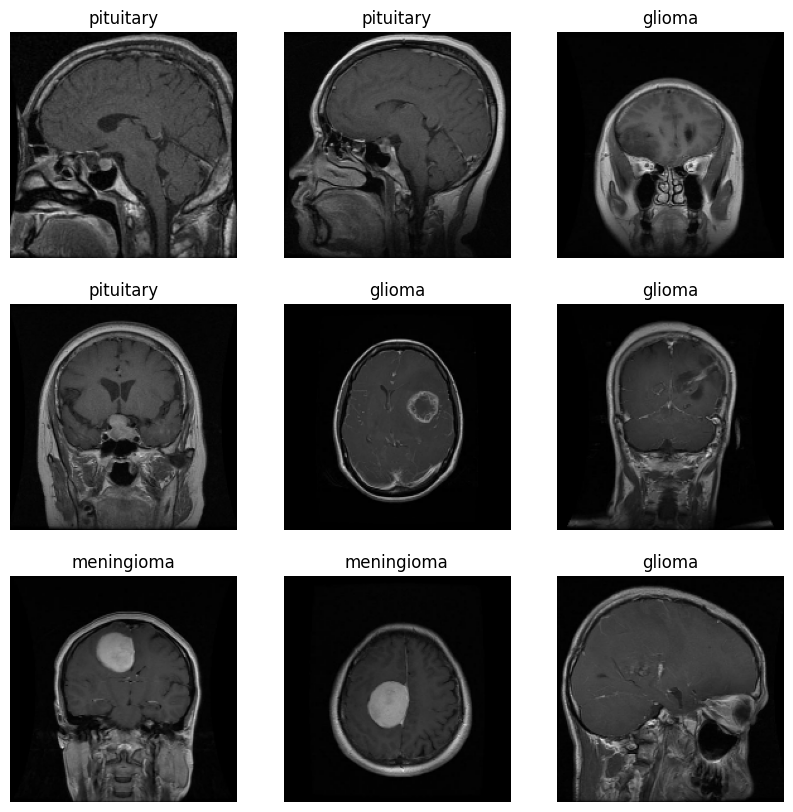

In [ ]:

plt.figure(figsize=(10, 10)) #creating a new figure
for images, labels in train_dataset.take(1): # it iterate the 1st batch
  for i in range(9): # it give 9 images from the batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

    #this is forr the basic generates a visual representation of the first 9 images in the train_dataset

AutoTune

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
#shuffeling is not need to validation data

Normalyze Data

In [ ]:
#it normalize the image values in 1to 255 range to the 0 and 1 form

normalization_layer = layers.Rescaling(1./255)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1) #randomly zoom in the direction of the horizonatl and vertical
])

Visualization Data

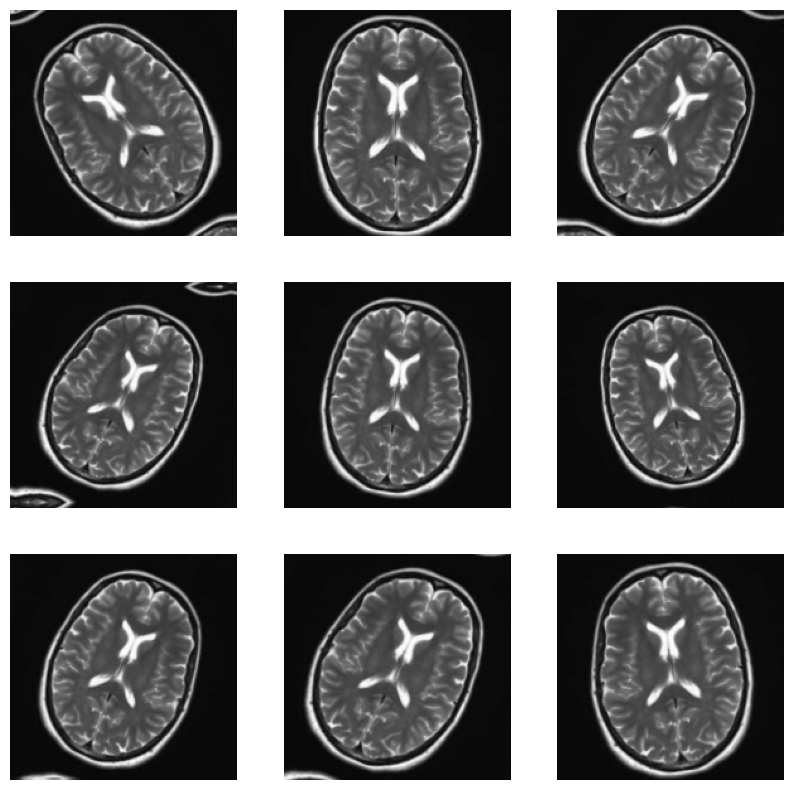

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Model

In [ ]:
num_classes = len(class_names)

model = keras.Sequential([
    data_augmentation,
    normalization_layer,
    layers.Conv2D(16, 3, padding='same', activation='relu'),#convolution operation
    layers.MaxPooling2D(),#reduce dimention of the feature
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),# no of neuron
    layers.Dense(num_classes, name="outputs")
])

Optimaze

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

Checkpoints

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Brain_Tumor.h5')
# Early Stopping
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [ ]:
epochs = 25
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[
        checkpoint_cb,
        early_stopping_cb
    ]
)

model.save('Brain_Tumor.h5')


Epoch 1/25
143/143 [==============================] - 13s 44ms/step - loss: 0.8798 - accuracy: 0.6317 - val_loss: 0.7276 - val_accuracy: 0.7180
Epoch 2/25
  1/143 [..............................] - ETA: 4s - loss: 0.6031 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


143/143 [==============================] - 4s 29ms/step - loss: 0.5809 - accuracy: 0.7676 - val_loss: 0.5208 - val_accuracy: 0.8056
Epoch 3/25
143/143 [==============================] - 4s 30ms/step - loss: 0.4621 - accuracy: 0.8228 - val_loss: 0.4339 - val_accuracy: 0.8511
Epoch 4/25
143/143 [==============================] - 4s 29ms/step - loss: 0.4155 - accuracy: 0.8385 - val_loss: 0.4643 - val_accuracy: 0.8126
Epoch 5/25
143/143 [==============================] - 4s 31ms/step - loss: 0.3796 - accuracy: 0.8560 - val_loss: 0.6100 - val_accuracy: 0.7671
Epoch 6/25
143/143 [==============================] - 4s 29ms/step - loss: 0.3579 - accuracy: 0.8663 - val_loss: 0.4408 - val_accuracy: 0.8100
Epoch 7/25
143/143 [==============================] - 4s 29ms/step - loss: 0.3165 - accuracy: 0.8759 - val_loss: 0.3340 - val_accuracy: 0.8748
Epoch 8/25
143/143 [==============================] - 4s 30ms/step - loss: 0.3091 - accuracy: 0.8853 - val_loss: 0.2974 - val_accuracy: 0.8862
Epoch 9/25

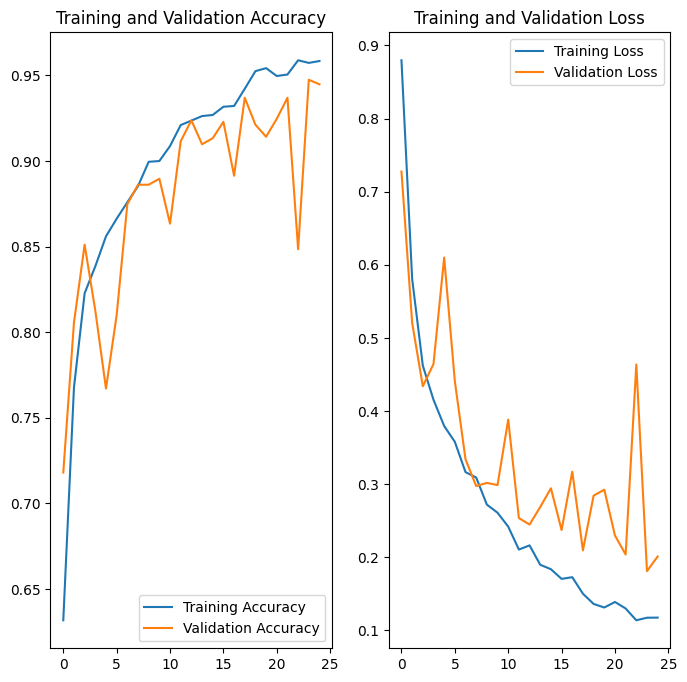

In [ ]:
epochs = len(history.epoch)
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Test DataSet
test_dataset = tf.keras.utils.image_dataset_from_directory(
  testing_dir,
  seed = 123,
  shuffle = True,
  image_size = (IMG_SIZE, IMG_SIZE),
  batch_size = 32)

Found 1311 files belonging to 4 classes.


In [ ]:
predictions = model.predict(test_dataset)
scores = tf.nn.softmax(predictions[:])

for i in range(10):
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(scores[i])], 100 * np.max(scores[i]) - 5)
    )


41/41 [==============================] - 2s 37ms/step
This image most likely belongs to glioma with a 71.69 percent confidence.
This image most likely belongs to glioma with a 87.41 percent confidence.
This image most likely belongs to notumor with a 95.00 percent confidence.
This image most likely belongs to pituitary with a 94.25 percent confidence.
This image most likely belongs to meningioma with a 94.10 percent confidence.
This image most likely belongs to pituitary with a 94.51 percent confidence.
This image most likely belongs to notumor with a 95.00 percent confidence.
This image most likely belongs to pituitary with a 91.49 percent confidence.
This image most likely belongs to pituitary with a 94.06 percent confidence.
This image most likely belongs to notumor with a 75.65 percent confidence.


In [ ]:
scores = model.evaluate(test_dataset)
scores

41/41 [==============================] - 1s 28ms/step - loss: 0.2085 - accuracy: 0.9268


[0.20851562917232513, 0.9267734289169312]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('Brain_Tumor.h5')

# Function to preprocess a single image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    return prediction[0][0]

# Example usage
image_path = '/content/Testing/pituitary/Te-piTr_0000.jpg'
prediction = predict_image(image_path)
if prediction > 0.5:
    print('The image contains a brain tumor.')
else:
    print('The image does not contain a brain tumor.')

1/1 [==============================] - 0s 122ms/step
The image does not contain a brain tumor.
